# Exploratory Data Analysis Churn Analysis


###### https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Dalam Churn Analysis, EDA sangat penting untuk memahami karakteristik pelanggan yang berhenti berlangganan atau tidak, sehingga perusahaan dapat mengambil tindakan yang tepat untuk meminimalkan churn rate.

*   membuat summary terkait langkah-langkah yang dikerjakan
*   membuat storytelling terkait data analysis yang sudah dikerjakan dan hasil visualisasi

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Pandas show all column
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

penjelasan library :

*   pandas : digunakan untuk manipulasi dan analisis data bentuk tabel atau dataframe
*   numpy : digunakan untuk perhitungan matematis data array
*   seaborn : digunakan untuk visualisasi dengan fokus plot statistik (scatter plot, box plot, histogram, dll)
*   matplotlib.pyplot : digunakan untuk visualisasi data sederhana (plot grafik dan chart)
* warnings : digunakan untuk mengabaikan warning yang muncul saat menjalankan kode



# Load Data

In [ ]:
df = pd.read_csv("dataset.csv")

# Data Understanding

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dari fungsi head() kita dapat mengetahui beberapa baris dari data untuk memahami bagaimana data tersusun. Data yang ditampilkan diatas berupa 5 baris teratas dari dataframe dengan 21 kolom.

In [ ]:
df.shape

(7043, 21)

Dari fungsi shape() kita dapat mengetahui informasi tentang jumlah baris dan kolom dataframe. Dari hasilnya terdapat 7043 baris dan 21 kolom pada dataframe yang sebenarnya.

In [ ]:
#show columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dari fungsi columns kita dapat mengetahui informasi tentang kolom yang terdapat pada dataframe. Hasil menampilkan seluruh kolom yang ada pada dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Yang perlu diperhatikan:
- Apakah ada data dengan tipe yang kurang sesuai? Misal, Name dengan tipe int64
- Apakah ada data yang hilang? Cari kolom dengan count < jumlah row

informasi yang dapat diambil dari info tersebut berupa :
* ada tipe data yang kurang sesuai, yaitu pada Total Charges yang seharusnya berupa tipe data float.
* untuk hasil dari info() sendiri tidak menunjukan adanya data null, sehingga mungkin diperlukan untuk pencarian lebih dalam.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else float(x))
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

Fungsi diatas digunakan untuk mengubah nilai pada kolom TotalCharges menjadi nilai yang diinginkan. Beberapa pejelasan mengenai fungsi:
* apply : digunakan untuk menerapkan fungsi pada tiap elemen dikolom TotalCharges
* lambda : digunakan untuk mengecek apakah dikolom TotalCharges ada yang sama dengan spasi
* penjelasan fungsi : apabila benar didalam kolom tersebut ada baris bernilai spasi, maka akan dirubah menjadi NaN menggunakan np.nan. Jika tidak maka tipe datanya akan dirubah ke float

Dengan begitu maka hasil selanjutnya, kita dapat mengecek melalui info, berapakah jumlah non-null pada kolom TotalCharges setelah dilakukan penerapan fungsi.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari hasil fungsi info() diatas maka dapat dilihat pada bagian TotalCharges, yang awalnya berjumlah 7043 non-null, menjadi 7032 non-null. Hal ini berarti bahwa perbahan object ke float menemukan beberapa baris yang berisi spasi atau nan. Maka:
* kita telah berhasil mengubah tipe data object menjadi float dan,
* menghilangkan nilai null pada kolom TotalCharges

In [ ]:
cats=[i for i in df.columns if df[i].dtypes == 'object' and i not in ['Churn', 'customerID']]
nums=[i for i in df.columns if df[i].dtypes != 'object']

Penyimpanan kolom diatas memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis. Code diatas dilakukan untuk membedakan antara kolom categorical dan numeric. Penjelasan kode :
* cats : memilih kolom-kolom yang memiliki tipe data 'object' (biasanya digunakan untuk data kategori seperti string atau objek lainnya) dengan mengecualikan kolom 'Churn' dan 'customerID'. Kolom-kolom yang terpilih akan dimasukkan ke dalam list cats.

* nums :  memilih kolom-kolom yang memiliki tipe data **selain** 'object' (yaitu tipe data numerik seperti integer atau float). Kolom-kolom yang terpilih akan dimasukkan ke dalam list nums.

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value count kolom Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Value count kolom OnlineBackup:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

Value count kolom DeviceProtection:
No                     3095
Yes              

Dari hasil kode diatas, kita dapat mengetahui frekuensi setiap nilai pada kolom dengan tipe data object yang ada pada cats.

## Statistical summary

Selanjutnya kita munculkan ringkasan statistik dataframe

### Pendekatan numerik

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah nilai maksimal/minimal masih berada di batas wajar? Min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data
- Apakah ada kolom dengan perbedaan yang signifikan antara mean dan median? Perbedaan antara mean/median mengindikasikan outlier atau skewed distribution

informasi yang dapat diambil dari data tersebut berupa :
- terdapat hal tidak masuk akal dari nilai yang tertera
- pada beberapa kolom terdapat nilai max yang bernilai cukup jauh dengan nilai median dan mean, sehingga perlu diperiksa apakah nilai max termasuk dalam batas wajar atau tidak
- kolom tenure dan MonthlyCharges memiliki perbedaan yang cukup signifikan antara mean dan mediannya (kemungkinan terdapat outlier atau skewed)
- kolom TotalCharges memiliki perbedaan cukup signifikan antara mean dan mediannya yaitu 885.825561 (terdapat nilai ekstrim pada data)


### Pendekatan kategorik

In [ ]:
df[cats].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


Yang perlu diperhatikan:
- Apakah jumlah unique values masuk akal?
- Apakah frekuensi dari nilai yang paling umum terlalu timpang? Apabila distribusi nilai terlalu timpang, feature tidak akan terlalu berguna dalam klasifikasi

informasi yang dapat diambil dari data tersebut berupa :
- terdapat uniqe values yang dirasa kurang masuk akal seperti unique value yang bernilai 3. Dalam hal ini, apakah terdapat satu nilai lain selain yes or no? Kita harus menelusurinya lebih dalam / menanyakan pada data engineering untuk hal tersebut.
- terdapat kolom yang miliki nilai timpang, yaitu kolom PhoneService. Nilai yes sebanyak 6361 yang timpang dengan nilai no. Maka tidak akan terlalu berguna dalam klasifikasi karena dapat mengurangi akurasi model.

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Boxplot 

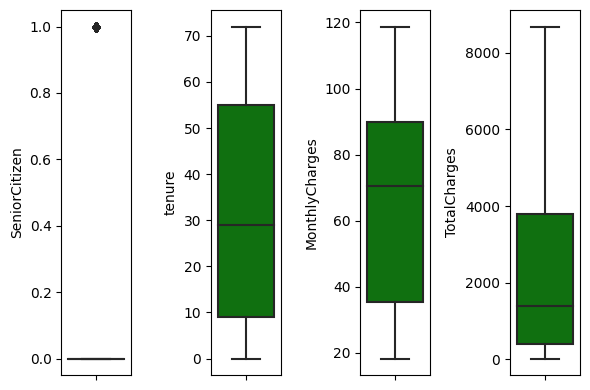

In [ ]:
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Yang perlu diperhatikan:
- Berapa banyak dan berapa jauh outlier di setiap kolom? Definisi umum outlier: berjarak 1.5x IQR dari Q1/Q3
- Bagaimana Distribusi Datanya ?

informasi yang dapat diambil dari boxplot tersebut berupa :

- setelah dilakukan pembuatan boxplot, kolom-kolom diatas tidak terlihat adanya outlier.
- distribusi data pada kolom tenure terlihat simetris (berdistribusi normal) dengan nilai tengah (median) yang hampir sama dengan nilai rata-rata (mean), serta terlihat tidak ada outlier yang signifikan.
- distribusi data pada kolom MonthlyCharges dan TotalCharges terlihat tidak simetris (miring) dengan letak garis median tidak berada di tengah kotak.
- jika nilai median tidak berada di tengah kotak pada boxplot, hal ini menunjukkan bahwa distribusi data cenderung tidak simetris atau condong ke salah satu sisi.
- jika median lebih dekat ke batas atas kotak, maka distribusi cenderung condong ke atas atau memiliki **skewness positif**, sedangkan jika median lebih dekat ke batas bawah kotak, maka distribusi cenderung condong ke bawah atau memiliki **skewness negatif**.

### Histplot

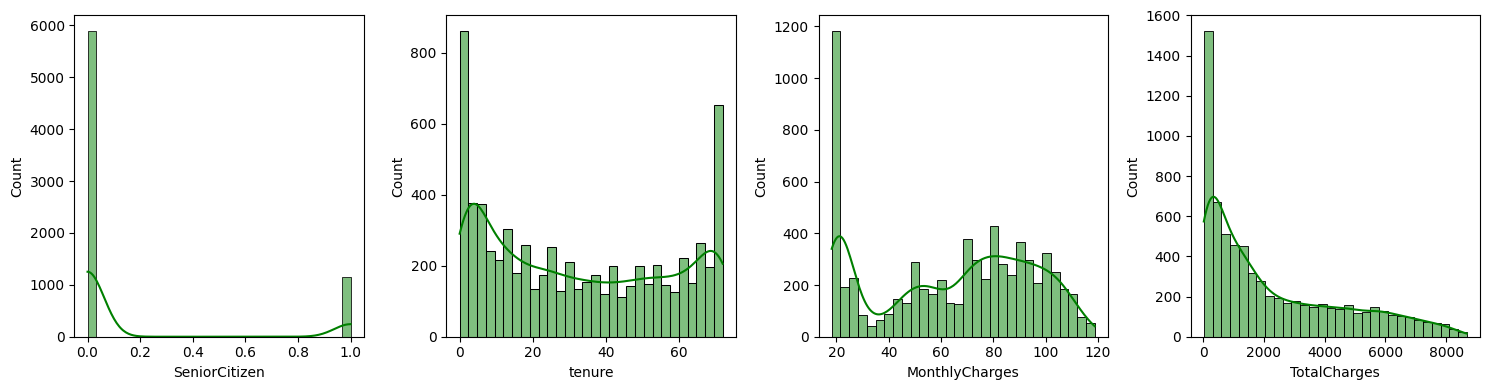

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 30)
    plt.tight_layout()

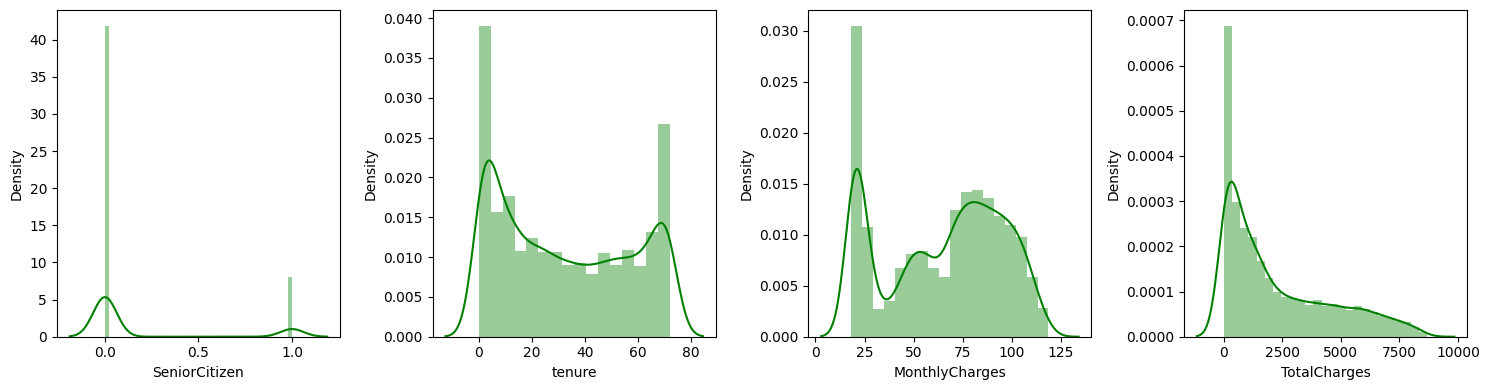

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

Yang perlu diperhatikan:
- Bagaimana bentuk distribusi setiap kolom? Apakah normal? Positive skewed? Negative skewed? Bimodal?
- Apakah ada nilai-nilai tertentu yang umum? Lonjakan pada distribution plot mungkin memiliki makna tertentu

informasi yang dapat diambil dari data tersebut berupa :
- grafik kolom SeniorCitizen dan tenure memiliki distribusi bimodal atau memiliki dua maksimum.
- grafik kolom MonthlyCharges memiliki distribusi multimodal atau memiliki lebih dari dua maksimum.
- grafik kolom TotalCharges memiliki distribusi positif skew (skewed right). Dalam distribusi skewness positif, ekor distribusi data lebih panjang di sisi kanan daripada di sisi kiri
- plot terdapat lonjakan pada nilai tertentu, hal ini dapat menandakan bahwa nilai tersebut lebih umum atau sering muncul daripada nilai lainnya. Hal ini bisa diindikasikan dengan adanya puncak (peak) pada plot tersebut.
-  data dengan frekuensi tinggi juga dapat membantu untuk mengambil keputusan yang lebih tepat karena memperlihatkan bahwa data tersebut tidak terlalu acak dan terdistribusi secara wajar. Namun, jika nilai yang umum terlalu mendominasi dan mengakibatkan skewness yang signifikan, maka hal tersebut dapat mengindikasikan adanya outlier atau data yang tidak representatif.

### Countplot (categorical)

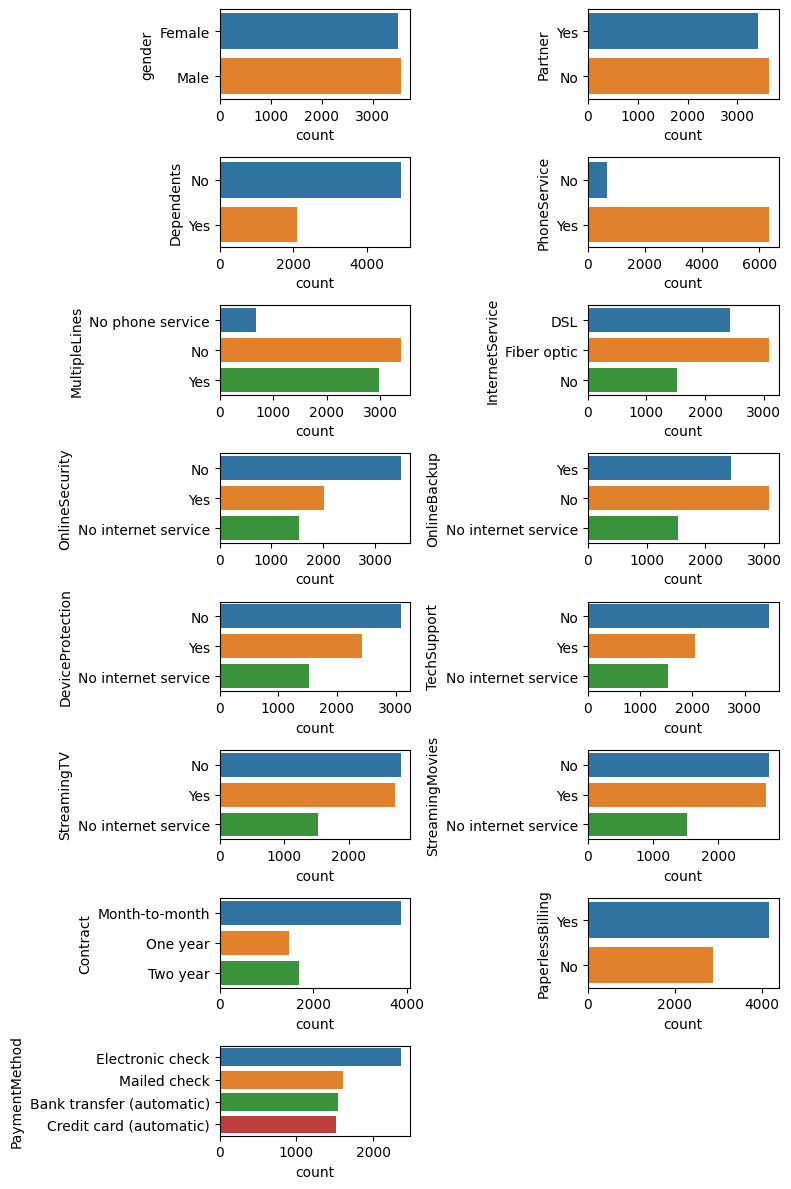

In [ ]:
plt.figure(figsize=(8, 12))
for i in range(0, len(cats)):
    plt.subplot(8, 2, i+1)
    sns.countplot(y = df[cats[i]], orient='v')
    plt.tight_layout()

Yang perlu diperhatikan:
- Ketimpangan antar kategori, terutama pada target Sebaran kategori yang timpang pada feature merupakan indikasi ketidakgunaan feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

informasi yang dapat diambil dari data tersebut berupa :
- jika terdapat ketimpangan yang signifikan antar kategori, terutama pada variabel target, maka dapat mempengaruhi kinerja model pembelajaran mesin dan menyebabkan hasil yang kurang akurat. 
- kategori yang terlalu sedikit akan menyebabkan **overfitting**, sedangkan kategori yang terlalu banyak dapat menyebabkan **underfitting**. 
- dalam hal ini ketimpangan yang terlihat, ada pada kolom PhoneService, dengan Yes yang lebih banyak dari No. Sehingga data tidak terlalu berguna.
- perlu dilakukan handling data seperti oversampling, undersampling, atau encoding ulang untuk mengatasi masalah tersebut.

## Multivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<Axes: >

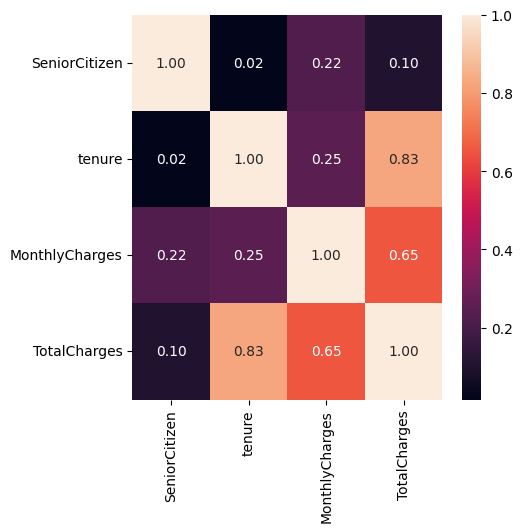

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target? Bila tidak, maka model linear tidak dapat digunakan
- Apakah ada 2 feature yang berkorelasi kuat (>0.9)? Bila ya, ada kemungkinan besar kedua feature tersebut redundan

informasi yang dapat diambil dari data tersebut berupa :
- terdapat feature yang memiliki korelasi dengan target.
- feature biasanya merujuk pada variabel-variabel independen atau input yang diukur dalam dataset, sedangkan target merujuk pada variabel dependen atau output yang ingin diprediksi
- feature yang berkorelasi dengan nilai 0.83 yaitu TotalCharges dan tenure.
- korelasi antara 0.8 hingga 1.0 dianggap sebagai korelasi yang sangat kuat.
- nilai korelasinya lebih besar dari 0,9 menunjukkan bahwa kedua fitur tersebut menyimpan informasi yang sama atau sangat mirip, sehingga salah satunya mungkin redundan dan dapat dihapus dari analisis.
- pada heatmap sendiri tidak ada feature yang mencapai nilai korelasi sebesar 0.9 


### Category Plot

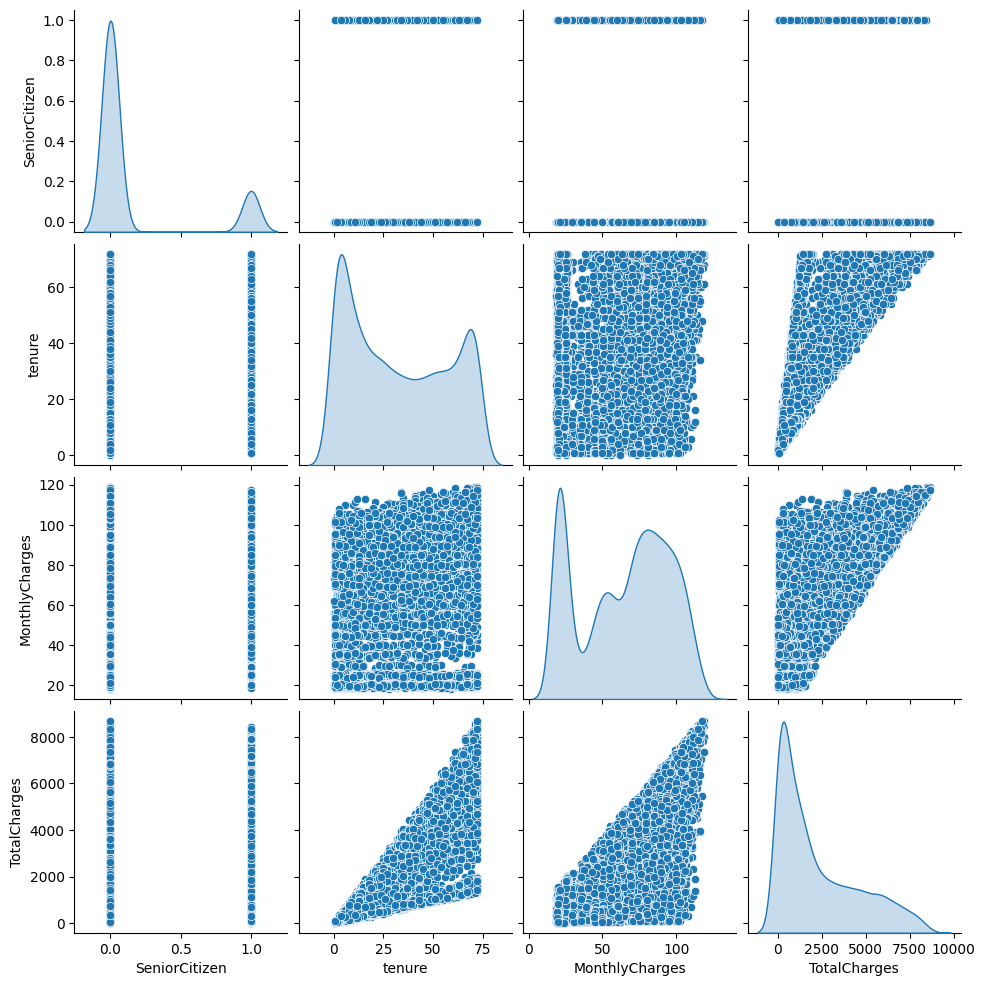

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

**Apakah ada scatter plot yang menunjukkan cluster yang
cukup jelas? Pola pada scatter plot bisa menjadi petunjuk untuk membuat feature baru**

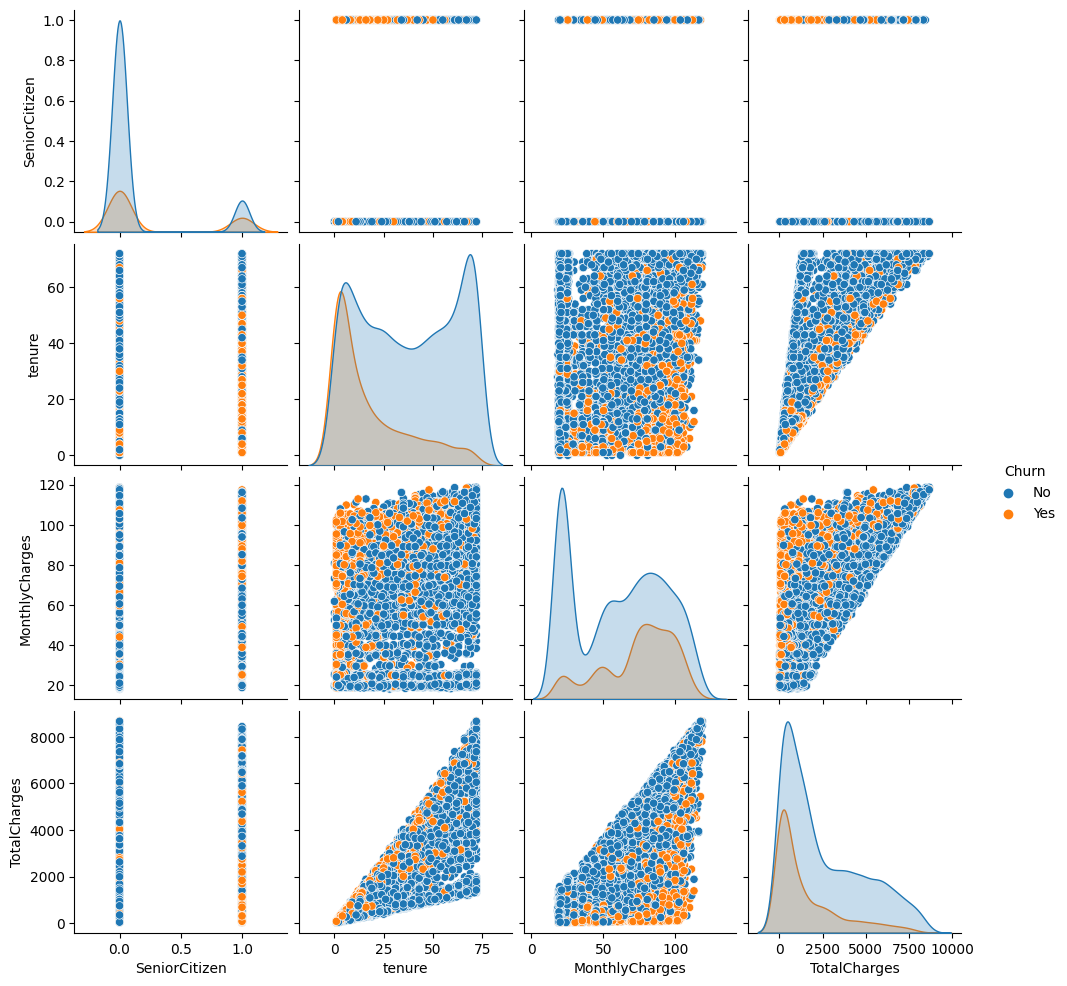

In [ ]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Churn')

Yang perlu diperhatikan:
- Apakah ada scatter plot dimana kedua warna terpisah dengan baik? Scatter plot dimana target terpisah dapat menjadi indikasi kombinasi fitur yang baik

informasi yang dapat diambil dari data tersebut berupa :
- scatter plot pertama tidak terlihat adanya pemisahan cluster-cluster dikarenakan warna yang sama yaitu biru.
- scatter plot kedua dengan warna biru dan oranye, cluster tidak terlalu terpisah dengan baik. Namun cluster biru dan oranye memiliki kecenderungan wilayah.
- contoh pada scatterplot MonthlyCharges dan TotalCharges cluster oranye ke arah kanan bawah dan cluster biru yang ke arah kiri atas.


Kesimpulan :

Data churn merupakan dataset yang berisi informasi tentang pelanggan dari sebuah perusahaan telekomunikasi. Tujuan dari analisis data churn adalah untuk memahami pola perilaku pelanggan dan faktor apa saja yang berpengaruh pada keputusan pelanggan untuk berhenti berlangganan layanan. Sebagai seorang data analis, setelah kita melakukan pengolahan data diatas, saya mendapat beberapa insight dari data churn.
- Sebagian besar pelanggan Telco memiliki layanan telepon rumah dan internet. Hal ini dapat dilihat dari hasil countplot bagian PhoneService dimana Yes lebih banyak dibandingkan dengan hasil No.
- Mayoritas pelanggan Telco adalah pelanggan baru yang memiliki masa tenancy kurang dari 2 tahun. Hal ini dapat dilihat dari hasil histogram yang memiliki nilai umum mendekati 0.
- Korelasi antara TotalCharges dan tenure menunjukkan bahwa semakin lama pelanggan berlangganan, semakin tinggi pula total tagihan yang harus dibayarkan. Hal ini dapat dilihat pada heatmap dengan nilai korelasi 0.83 .
- Dari scatterplot, terlihat bahwa pelanggan dengan tagihan bulanan yang lebih tinggi cenderung berpindah ke penyedia layanan lain. Namun, jika pelanggan tersebut telah berlangganan untuk waktu yang lama, maka mereka cenderung tetap loyal pada Telco.
- Clustering scatter plot menunjukkan bahwa ada beberapa kelompok pelanggan yang cenderung memiliki perilaku yang sama dalam menggunakan layanan Telco. Hal ini dapat digunakan untuk melakukan segmentasi pelanggan dan menentukan strategi pemasaran yang lebih efektif untuk masing-masing kelompok.